In [50]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# Load data

In [51]:
X_raw = np.load('X.npy')
X_raw = X_raw / 255.
y = np.load('y.npy')
X = []
size = (28, 28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

# Show data

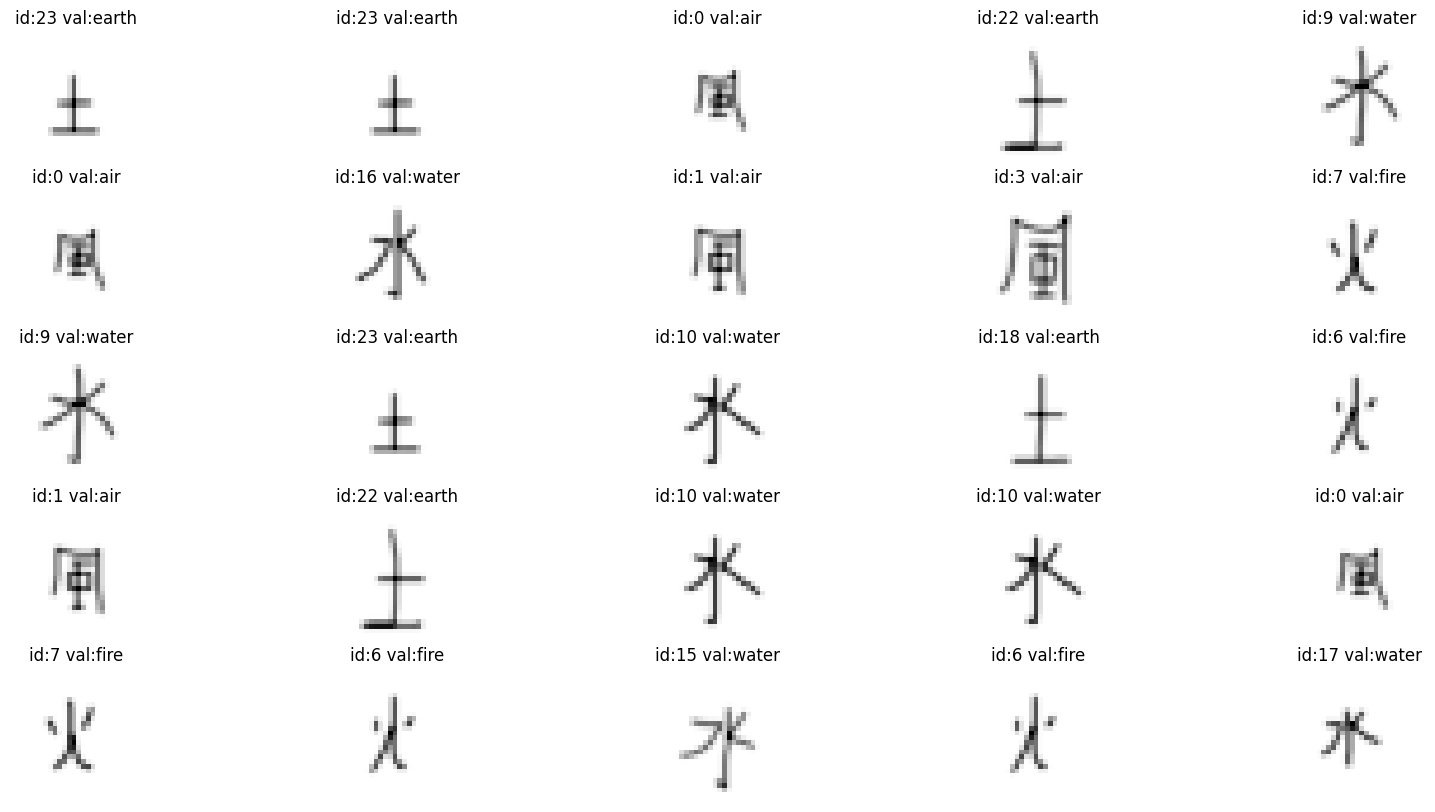

In [52]:
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx]))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Split data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(20, 28, 28, 1) (6, 28, 28, 1)


# Create model

In [54]:
bs = 16
lr = 0.0001
class_mapping = { 'air':0,  'fire':1,  'water':2,  'earth':3}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [55]:
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(*size, 1)),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(256, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax') 
])

In [56]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 128)        

# Train model

In [57]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=10, validation_data=(X_test, y_test))
model.save('model.keras')

Epoch 1/10
2/2 [==============================] - 0s 107ms/step - loss: 1.3837 - accuracy: 0.3500 - val_loss: 1.3840 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3840 - accuracy: 0.3000 - val_loss: 1.3840 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3848 - accuracy: 0.3000 - val_loss: 1.3840 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3838 - accuracy: 0.3500 - val_loss: 1.3840 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3836 - accuracy: 0.3000 - val_loss: 1.3839 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3867 - accuracy: 0.2000 - val_loss: 1.3839 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 1.3839 - accuracy: 0.3500 - val_loss: 1.3839 - val_accuracy: 0.3333
Epoch 8/10
2/2 [==========

# testing model

In [58]:
#Probando modelo
etiqueta_a_symbols = {0: 'air', 1: 'fire', 2: 'water', 3: 'earth'}

In [59]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_symbol = etiqueta_a_symbols.get(label, 'unknown')

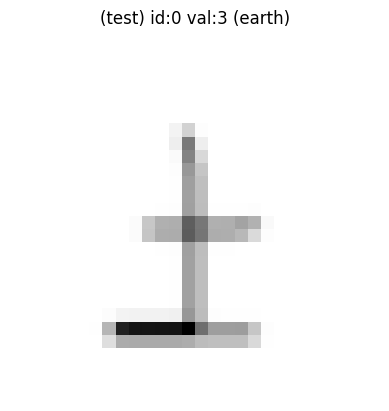

In [60]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombre_symbol))
plt.axis('off')
plt.imshow(-im[:, :, 0], cmap='gray')
plt.show()

In [61]:
#Usando el modelo
salida = model.predict(im[None, :, :, :])[0]

1/1 [==============================] - 0s 49ms/step


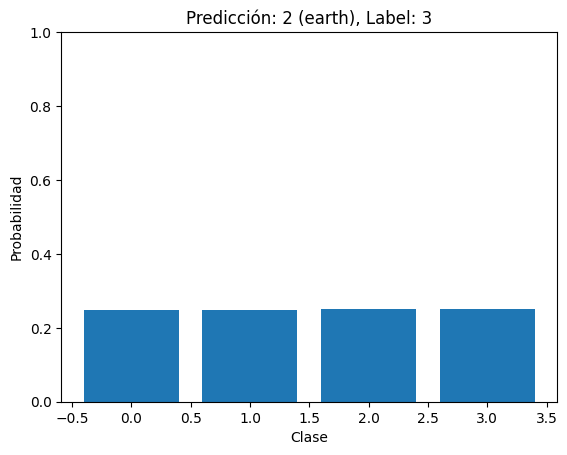

In [62]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombre_symbol, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()

In [64]:
salida.argmax()

2